# **Класифікація**

![classification](https://images.datacamp.com/image/upload/v1663850410/Machine_learning_classification_illustration_for_the_email_a993b8df37.png)




In [ ]:
# import os
# print(os.getcwd())
# os.chdir('./drive/MyDrive/')
# print(os.getcwd())
# df = pd.read_csv(f"./drive/MyDrive/{name_of_csv_file}.csv")

/content
/content/drive/MyDrive


# **Логістична регресія**

Розглянемо приклад лінійного класифікатора для бінарної задачі класифікації - тобто у нас є всього два класи, два ймовірні варіанти під час класифікації наших екземплярів. Наприклад, ми хочемо спрогнозувати, чи вступить абітурієнт на бюджетне місце, чи ні, в залежності від того, як від здав 2 вступні іспити:


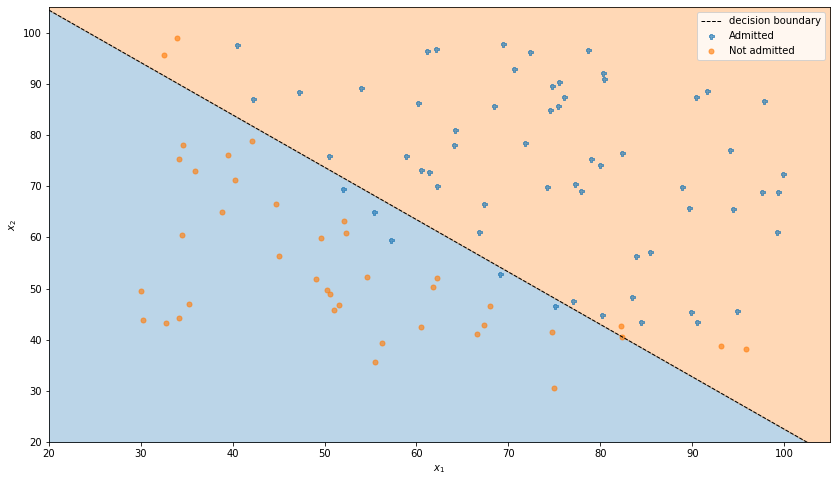

Ми шукаємо пряму, яка розділяє прийнятих на навчання абітурієнтів від тих, хто не отримав бюджетне місце. Це називається межею вибору або рішенням. Ми використовуємо лінійний класифікатор, який представляється формулою:

$$w_0 + w_1*x_1 + w_2*x_2 = 0$$

Тут w0 є вільним коефіцієнтом або зсувом, x0 = 1, і використовується розширений вектор ознак:

$$w = (w_0, w_1, w_2)$$
$$x = (1, x_1, x_2)$$

Таким чином, рівняння межі вибору виглядає як:

$$w ⋅ x = 0$$

Якщо ми використовуємо приклад $(x^{(i)})$ зі свого набору даних, і якщо точка знаходиться над межею вибору (який означає, що студент успішно склав вступні іспити), то скалярний добуток вектора ознак з вектором вагів буде додатнім:

$$w ⋅ x^{(i)} > 0$$

Якщо студент не отримав бюджетне місце, скалярний добуток буде від'ємним:

$$w ⋅ x^{(i)} < 0$$

Отже, ми можемо класифікувати абітурієнтів за знаком значення нашої гіпотези:

$$w ⋅ x^{(i)} > 0, абітурієнт \ здав \ іспити $$
$$w ⋅ x^{(i)} < 0, абітурієнт \ не \ вступив $$


# **Логістична функція**

Як оцінити, наскільки близько абітурієнт був до провалу, якщо ми отримали значення 100? На перший погляд, 100 виглядає більшим за 0 і може здатися, що студент міцно забезпечив собі бюджетне місце. Однак, щоб отримати чітке уявлення про його успішність, ми повинні порівняти його з іншими прикладами в нашому наборі даних. Наприклад, якщо інші абітурієнти мали значення 1000, 3000 і більше, то очевидно, що абітурієнт зі значенням 100 мав відносно низький результат.

Тому, щоб мати незалежну оцінку, ми можемо використовувати ймовірнісну шкалу. Наприклад, можемо використовувати логістичну функцію, яка перетворює значення z у діапазон [0; 1]. Ця функція дає нам можливість оцінити ймовірність того, що абітурієнт успішно склав іспити та отримав бюджетне місце.

![image](https://www.saedsayad.com/images/LogReg_1.png)



Також сигмоїд функцію можно вивести:

0. $$y = p = b_0 + b_1 x $$

1. $$odds = \frac{p}{1-p}$$
де p - ймовірність приналежності прикладу до класу, а 1-p - що не приналежить до класу. Так як потрібна ймовірність від 0 до 1, то зробимо наступні перетворення.

2. $$ln(\frac{p}{1-p}) = b_0 + b_1 x$$

3. $$e^{ln(\frac{p}{1-p})} = e^{b_0 + b_1 x}$$

4. $$\frac{p}{1-p} = e^{b_0 + b_1 x}$$

5. $$p = e^{b_0 + b_1 x} - pe^{b_0 + b_1 x} $$

6. $$p (1 + e^{b_0 + b_1 x}) = e^{b_0 + b_1 x}$$

7. $$p = \frac{e^{b_0 + b_1 x}}{1 + e^{b_0 + b_1 x}}$$

8. $$p = \frac{\frac{e^{b_0 + b_1 x}}{e^{b_0 + b_1 x}}}{\frac{1 + e^{b_0 + b_1 x}}{e^{b_0 + b_1 x}}}$$

9. $$p = \frac{1}{1 + e^{-(b_0 + b_1 x)}}$$

10. $$p = \frac{1}{1 + e^{-z}}$$



# **Функція гіпотези**

Тепер ми можемо чітко сформулювати математичну модель нашого класифікатора. Ми використовуємо логістичну функцію, яка приймає скалярний добуток вектора ознак та вектора вагів. Результатом є ймовірність, з якою даний приклад належить до позитивного класу (успішне складання іспитів для вступу на бюджетне місце):

$$\hat{y} = h(x) = \frac{1}{1 + exp(-w ⋅ x)} = \sigma(z)$$

In [ ]:
# z = w * x

4.5397868702434395e-05 0.9998766054240137


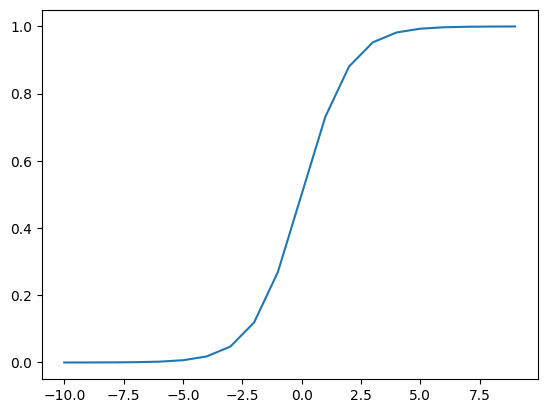

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 1)
w = np.array([1])
y = 1 / (1 + np.exp(-w * x))
print(np.min(y), np.max(y))

plt.plot(x, y)


Так як функція $\hat{y}$ нелінійна, то і функція втрат буде нелінійна

![image](https://editor.analyticsvidhya.com/uploads/48635download.jpg)

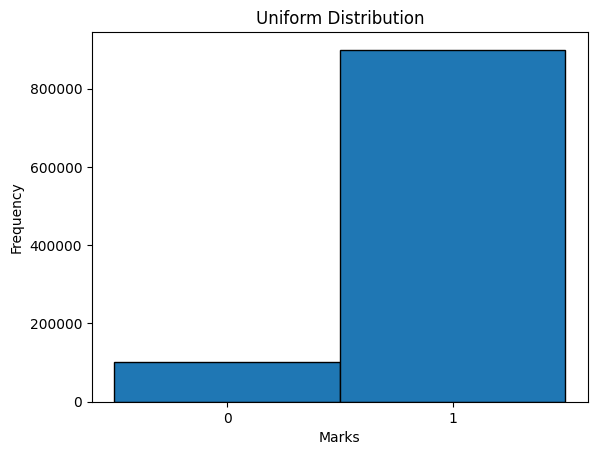

Empirical Probabilities: [0.100643, 0.899357]
Expected Value: 0.9


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Target marks and probabilities
marks = [0, 1]
probs = [0.1, 0.9]

# Simulate multiple samples
num_samples = 1000000
samples = np.random.choice(marks, size=num_samples, p=probs)

# Plotting the distribution
plt.hist(samples, bins=[-0.5, 0.5, 1.5], edgecolor='black')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title('Uniform Distribution')
plt.xticks([0, 1])
plt.show()

# Calculate the empirical probabilities
empirical_probs = [np.sum(samples == m) / num_samples for m in marks]
print('Empirical Probabilities:', empirical_probs)

# Calculate the expected value using Bernoulli formula
expected_value = sum([mark * prob for mark, prob in zip(marks, probs)])
print("Expected Value:", expected_value)

# # Calculate the Log Maximum Likelihood Estimation (LME)
# lmle = np.sum([obs * np.log(prob) + (1 - obs) * np.log(1 - prob) for obs, prob in zip(samples, probs)])
# print("Log Maximum Likelihood Estimation (LME):", lmle)



# **Функція втрат**

Почнемо виводити формулу втрат:

1. $$L(\beta) = \prod_{i=1}^n \hat{y}_i^{y_i} \cdot (1-\hat{y}_i)^{1-y_i}$$

У цій формулі, $L(\beta)$ є функцією правдоподібності, $\beta$ - параметрами моделі, $y_i$ - спостережені значення випадкової величини, а $\hat{y}_i$ - передбачені ймовірності, які отримані від моделі.

Ця формула використовується для обчислення ймовірності спостереженого значення випадкової величини згідно з моделлю Бернуллі. Кожне спостереження $y_i$ має значення 0 або 1, і ймовірність $\hat{y}_i$ вказує на ймовірність того, що випадкова величина приймає значення 1. Функція правдоподібності оцінює, наскільки ймовірність моделі відповідає спостереженим значенням.

Важливо відзначити, що функція правдоподібності може бути логарифмічною функцією правдоподібності (log-likelihood function), оскільки логарифм є монотонною функцією і не впливає на максимізацію чи мінімізацію.

2. $$ln(L(\beta)) = ln(\prod_{i=1}^n \sigma(\beta \cdot x)^{y} \cdot (1-\sigma(\beta \cdot x))^{1-y}$$

$$\log(ab) = \log(a) + \log(b)$$
$$\log(a^b) = b\log(a)$$

3. $$ln(L(\beta)) = \sum_{i=1}^n [y \cdot ln(\sigma(\beta \cdot x)) + (1 - y) \cdot ln(1-\sigma(\beta \cdot x))]$$

$$max(ln(x)) = min(-ln(x)) $$

5. $$-ln(L(\beta)) = -\sum_{i=1}^n [y \cdot ln(\sigma(\beta \cdot x)) + (1 - y) \cdot ln(1-\sigma(\beta \cdot x))]$$

![image](https://editor.analyticsvidhya.com/uploads/7534219.png)


In [ ]:

# w_new_0 = w_prev_0 - learning_rate * gradient_w_0
# w_new_1 = w_prev_1 - learning_rate * gradient_w_1



# **Навчання логістичної регресії**

Тепер, знаючи функцію втрат нашої моделі, ми можемо застосувати метод градієнтного спуску для пошуку вектора параметрів, що відповідає найкращій гіпотезі. Потрібно обчислити градієнти для функції втрат. Спочатку порахуємо похідну для сігмоїдної функції:


- Застосовуючи правило ланцюгового диференціювання, ми маємо: $$\frac{\partial J(\mathbf{w})}{\partial w_j} = \frac{\partial J(\mathbf{w})}{\partial h(\mathbf{x}^{(i)})} \cdot \frac{\partial h(\mathbf{x}^{(i)})}{\partial z^{(i)}} \cdot \frac{\partial z^{(i)}}{\partial w_j}$$

- Обчислюємо $\frac{\partial J(\mathbf{w})}{\partial h(\mathbf{x}^{(i)})}$:
   - Для позитивного класу $(y^{(i)} = 1)$, $$\frac{\partial J(\mathbf{w})}{\partial h(\mathbf{x}^{(i)})} = -\frac{1}{h(\mathbf{x}^{(i)})}$$
   - Для негативного класу $(y^{(i)} = 0)$, $$\frac{\partial J(\mathbf{w})}{\partial h(\mathbf{x}^{(i)})} = \frac{1}{1 - h(\mathbf{x}^{(i)})}$$
- Обчислюємо $\frac{\partial h(\mathbf{x}^{(i)})}{\partial z^{(i)}}$:
     - Оскільки $h(\mathbf{w}) = \sigma(\mathbf{X}\mathbf{w})$, похідна має вигляд $\frac{\partial h(\mathbf{x}^{(i)})}{\partial z^{(i)}} = h(\mathbf{x}^{(i)})(1 - h(\mathbf{x}^{(i)}))$
     
     (https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e)
- Обчислюємо $\frac{\partial z^{(i)}}{\partial w_j}$:
     - Для $j$-го ваги, $\frac{\partial z^{(i)}}{\partial w_j} = x_j^{(i)}$
- Помножимо всі похідні, які ми обчислили, і просумуємо їх по всіх тренувальних прикладах, щоб отримати кінцевий вираз.

Тепер, підставивши ці похідні, ми можемо обчислити градієнт функції втрат:

$$\frac{{\partial J(\mathbf{w})}}{{\partial w_j}} = \frac{1}{m} \sum_{i=1}^{m} (h(\mathbf{x}^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$$

Отже, крок навчання за допомогою градієнтного спуску буде виглядати так:

$$w_j := w_j - \alpha \cdot \frac{{\partial J(\mathbf{w})}}{{\partial w_j}}$$

або у векторному вигляді:

$$\mathbf{w} := \mathbf{w} - \alpha \cdot \frac{1}{m} X^T (\sigma(X \mathbf{w}) - \mathbf{y})$$

де:
- $\mathbf{w}$ - вектор параметрів
- $\alpha$ - коефіцієнт швидкості навчання
- $X$ - матриця ознак
- $\mathbf{y}$ - вектор цільових значень


In [500]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Завантаження датасету
X, y = load_iris(return_X_y=True)
X = X[y!=0]
y = y[y!=0]

df_X = pd.DataFrame(X, columns=["x1", "x2", "x3", "x4"])
df_y = pd.DataFrame(y, columns=["target"])

display(df_X.describe())
display(df_y.value_counts())



,x1,x2,x3,x4
count,100.000000,100.000000,100.000000,100.000000
mean,6.262000,2.872000,4.906000,1.676000
std,0.662834,0.332751,0.825578,0.424769
min,4.900000,2.000000,3.000000,1.000000
25%,5.800000,2.700000,4.375000,1.300000
50%,6.300000,2.900000,4.900000,1.600000
75%,6.700000,3.025000,5.525000,2.000000
max,7.900000,3.800000,6.900000,2.500000


target
1         50
2         50
dtype: int64

| Метод      | Регуляризатори          |
|------------|------------------------|
| newton-cg  | l2, none               |
| lbfgs      | l2, none               |
| liblinear  | l1, l2                 |
| sag        | l2, none               |
| saga       | elasticnet, l1, l2, none|

In [501]:
# For L1 Regularization (Lasso):
# C = 1 / (alpha * n_samples)
# For L2 Regularization (Ridge):
# C = 1 / (alpha * 2 * n_samples)
# For ElasticNet
# C = 1 / (alpha * l1_ratio * n_samples)

# Ініціалізація та навчання моделі логістичної регресії
clf = LogisticRegression(
    solver="saga",
    multi_class="ovr",
    # l1_ratio=0.5,
    # class_weight="balanced",
    # C=10,
    penalty="l2", #"l2", "elasticnet"
    random_state=0
    )
clf.fit(X, y)

print(clf.intercept_, clf.coef_)

[-2.34222866] [[-1.58285401 -1.41762131  2.4955279   2.4831297 ]]


In [493]:

# Prediction on a new sample
new_sample = np.array([[6.1, 3.1, 5.1, 1.9]])
sample = np.concatenate([np.ones((1, 1)), new_sample.T])

# Calculate the probabilities manually
coeffs = np.hstack([clf.intercept_.reshape(-1,1), clf.coef_])
log_odds = np.dot(coeffs, sample)
probabilities = 1 / (1 + np.exp(-log_odds))
# predicted_class = np.argmax(probabilities)
predicted_class = 2 if probabilities >= 0.5 else 1
print(probabilities)

print("Predicted class:", predicted_class)
print("Predicted probabilities:", np.round(probabilities, 3))


[[0.75235948]]
Predicted class: 2
Predicted probabilities: [[0.752]]


In [502]:
# Передбачення на новому прикладі
new_sample = np.array([[6.1, 3.1, 5.1, 1.9]])
predicted_class = clf.predict(new_sample)
print("Predicted class:", predicted_class)
predicted_proba_class = clf.predict_proba(new_sample).round(3)
print("Predicted probabilities:", predicted_proba_class)


Predicted class: [2]
Predicted probabilities: [[0.259 0.741]]


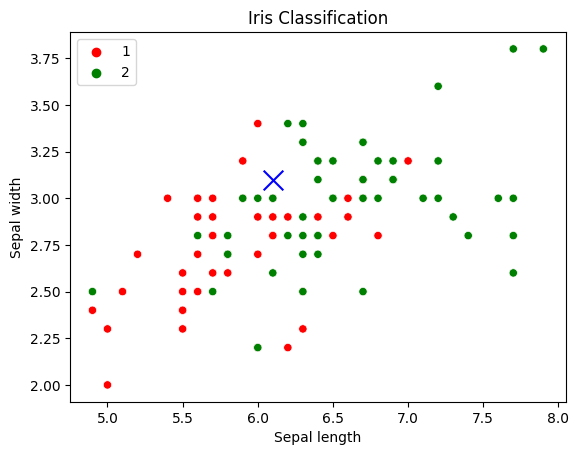

In [495]:
# Візуалізація результатів
colors = ["red", "green", "blue"]
sns.scatterplot(data=df_X, x="x1", y="x2", palette=colors, hue=y)
plt.scatter(new_sample[:, 0], new_sample[:, 1], color=colors[predicted_class[0]], marker='x', s=200)
plt.legend()
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Classification')
plt.show()


# **Мультикласова класифікація**

У машинному навчанні існує багато задач, де потрібно класифікувати об'єкти на більш ніж два класи. Це відомо як мультикласова класифікація. Для розширення бінарної класифікації на випадок більшої кількості класів, можна використовувати різні стратегії, такі як "один проти всіх" (One-vs-Rest) і "всі проти всіх" (One-vs-One).

**Стратегія "один проти всіх" (One-vs-Rest)**
-------------------------------------------------

Стратегія "один проти всіх" полягає в побудові бінарних класифікаторів для кожного класу, які відрізняють цей клас від інших класів. Загалом, ми будуємо N класифікаторів для N класів, де N - кількість класів. Для класифікації нового об'єкта, ми отримуємо прогнози від кожного класифікатора, і об'єкт призначається класу з найбільшою кількістю голосів. В бібліотеці scikit-learn цю стратегію можна використовувати за допомогою класу `OneVsRestClassifier`.


In [507]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Завантаження датасету Iris
X, y = load_iris(return_X_y=True)

# Ініціалізація та навчання класифікатора
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X, y)

# Приклад передбачення на нових даних
new_samples = np.array([[6.1, 3.1, 5.1, 1.9]])

predicted_classes = clf.predict(new_samples)
predicted_probabilities = clf.predict_proba(new_samples)

print("Predicted classes:", predicted_classes)
print("Predicted probabilities:", np.round(predicted_probabilities*100, 2))


Predicted classes: [2]
Predicted probabilities: [[ 0.09 26.66 73.25]]


**Стратегія "один проти одного" (One-vs-One)**
-------------------------------------------------

Стратегія "один проти одного" використовується для побудови класифікаторів, які відрізняють кожну пару класів один від одного. Це означає, що для N класів нам потрібно побудувати
N * (N-1) / 2
бінарних класифікаторів. Потім здійснюється голосування, і об'єкт призначається класу, який набрав найбільшу кількість голосів. В бібліотеці scikit-learn цю стратегію можна використовувати за допомогою класу `OneVsOneClassifier`.


In [ ]:
# One-vs-Rest
# 1 vs (2 and 3, and 4)
# 2 vs (1 and 3, and 4)
# 3 vs (1 and 2, and 4)
# 4 vs (1 and 2, and 3)

# One-vs-One
#  1 vs 2
#  1 vs 3
#  1 vs 4
#  2 vs 3
#  2 vs 4
#  3 vs 4


In [508]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression

# Завантаження датасету Iris
X, y = load_iris(return_X_y=True)

# Ініціалізація та навчання
clf = OneVsOneClassifier(LogisticRegression(random_state=0))
clf.fit(X, y)

# Приклад передбачення на нових даних
new_samples = np.array([[6.1, 3.1, 5.1, 1.9]])

predicted_classes = clf.predict(new_samples)
print("Predicted classes:", predicted_classes)


Predicted classes: [2]


# **Перенавчання**

## **Недонавчання: (underfitting)**
Уявіть, що вам поставили математичну задачу, а ви надали занадто просте рішення, яке не враховує всі необхідні деталі. У цьому випадку ви "недонавчили" задачу. Так само в машинному навчанні недонавчання виникає, коли модель занадто проста, щоб вловити основні закономірності в даних. Вона не може усвідомити складність проблеми і дає занадто загальні прогнози. Точно так само, як надати просте і неповне рішення до математичної задачі, модель, яка недонавчена, надає неточні прогнози та має погану продуктивність.

## **Перенавчання: (overfitting)**
Тепер уявіть, що у вас є інша математична задача, і ви намагаєтесь її вирішити за допомогою надто складного і заплутаного підходу. У цьому випадку ви "перенавчили" задачу, включивши непотрібні деталі і роблячи її занадто специфічною для вихідних даних. У машинному навчанні перенавчання відбувається, коли модель стає надто складною і "навчається" шумів та випадкових варіацій в навчальних даних. Вона точно підлаштовується під навчальні дані, але коли стикається з новими, невиданими даними, показує погані результати. Аналогічно забезпеченню надто складного рішення для математичної задачі, перенавчена модель може запам'ятати навчальні приклади, не розуміючи основних закономірностей, що призводить до поганої узагальненості на нові дані.

## **Підсумовуючи:**
- Недонавчання виникає, коли модель занадто проста і не може вловити складність проблеми, що призводить до поганої продуктивності.
- Перенавчання відбувається, коли модель стає надто складною, запам'ятовує навчальні дані і погано узагальнюється на нові дані.

В обох випадках важливо знайти правильний баланс. Добре підігнана модель враховує основні закономірності в даних, не будучи занадто простою або надто складною, що призводить до точних прогнозів як на навчальних, так і на нових даних.

**Викривлення:** Це різниця між середнім передбаченням моделі та правильним значенням. Високе викривлення відбувається, коли модель спрощується та мало звертає увагу на тренувальні дані, що призводить до високих помилок як на тренувальних, так і на тестових даних.

**Розсіювання:** Це варіабельність передбачень моделі для певної точки даних. Високе розсіювання відбувається, коли модель перенавчається на тренувальних даних і не узагальнюється до нових даних, що призводить до низьких помилок на тренувальних даних, але високих помилок на тестових даних.

**Компроміс між викривленням та розсіюванням:** Моделі з недостатньою кількістю параметрів мають високе викривлення та низьке розсіювання, тоді як моделі з великою кількістю параметрів мають високе розсіювання та низьке викривлення. Потрібно знайти правильний баланс, щоб уникнути перенавчання або недонавчання даних.

**Загальна помилка:** Мета полягає в мінімізації загальної помилки, яка складається з квадрату викривлення, розсіювання та неподоланої помилки, що представляє шум в даних.

Розуміння цих концепцій допомагає побудувати точні моделі та уникнути перенавчання або недонавчання даних. Важливо знайти оптимальний баланс між викривленням та розсіюванням, щоб модель могла виявити основні закономірності даних та добре узагальнювати до нових даних.

![image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*xwtSpR_zg7j7zusa4IDHNQ.png)

![image](https://miro.medium.com/v2/resize:fit:828/format:webp/1*9hPX9pAO3jqLrzt0IE3JzA.png)

![image](https://miro.medium.com/v2/resize:fit:720/format:webp/1*RQ6ICt_FBSx6mkAsGVwx8g.png)

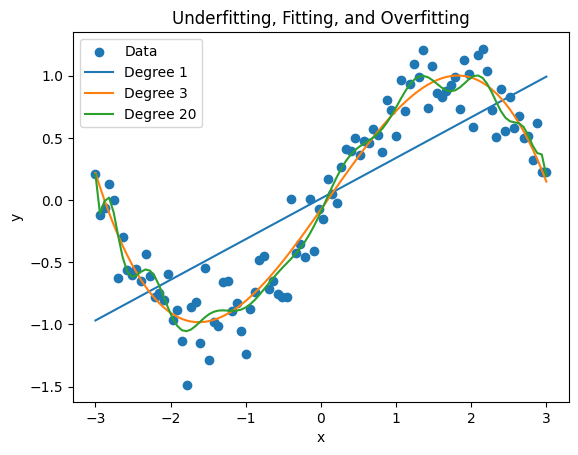

In [513]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate the dataset with a sinusoidal relationship
np.random.seed(0)
X = np.linspace(-3, 3, 100)
y = np.sin(X) + np.random.normal(0, 0.2, 100)

# Reshape the input variable for scikit-learn
X = X.reshape(-1, 1)

# Plot the dataset
plt.scatter(X, y, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Underfitting, Fitting, and Overfitting')
plt.legend()

# Perform polynomial regression with varying degrees
degrees = [1, 3, 20]

for degree in degrees:
    # Transform the features to include polynomial terms
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Fit the polynomial regression model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Generate predictions
    X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
    X_range_poly = poly_features.transform(X_range)
    y_pred = model.predict(X_range_poly)

    # Plot the fitted curve
    label = f'Degree {degree}'
    plt.plot(X_range, y_pred, label=label)

plt.legend()
plt.show()


In [514]:
# 1. Regularization: l1, l2 norm
# 2. Simplify your model (Example: lower degree of polynomial features; Example: decrease the depth of a desicion tree model)
# 3. Descrease # of variables, feature selection
# 4. Increase # of samples
# 5. Neural Networks: Dropout
# 6. Convolutional Neural Networks: Image Augmentation


# **Регуляризація**

Перенавчання (overfitting) виникає, коли модель надмірно адаптується до тренувальних даних і не може добре узагальнити нові приклади. Регуляризація є методом боротьби з перенавчанням у лінійних моделях.

Перенавчання можна виявити за допомогою кількох ознак. Одним з сигналів перенавчання є великі ваги, які призначаються ознакам у моделі. Іншою проблемою, яка вказує на перенавчання, є мультиколлінеарність, коли ознаки у навчальних даних є лінійно залежними.

Для боротьби з перенавчанням використовується регуляризація, яка полягає у додаванні додаткового члену до функції втрат. Найпростіший регуляризатор - квадратичний регуляризатор, який обмежує розмір ваг моделі. Це досягається шляхом додавання суми квадратів ваг до функції втрат.

**Функція втрат у регуляризованій моделі виглядає так:**

$$Q(ω,X) + λ∣∣ω∣∣^2$$

- де $Q(ω,X)$ - функція втрат без регуляризації,
- $λ$ - параметр регуляризації,
- $ω$ - вектор ваг моделі,
- $X$ - матриця навчальних даних.

**Метою є мінімізація цієї функції**, шукаючи такий вектор ваг ω, при якому функція втрат приймає мінімальне значення, а сам вектор ω має мінімально можливу довжину. Це допомагає уникнути надмірно великих ваг в моделі.

У лінійних моделях регуляризацію можна реалізувати за допомогою методу гребеневої регресії (Ridge Regression). Цей метод додає квадратичний регуляризатор до функції втрат і мінімізує її за допомогою чисельних методів, таких як градієнтний спуск.


# **Normal equation**

\begin{align*}
    &\text{1. Start with the cost function:} \\
    &J(\mathbf{w}) = \frac{1}{2} ||\mathbf{X}\mathbf{w} - \mathbf{y}||_2 + \frac{1}{2} \lambda \|\mathbf{w}\|_2 \\
    \\
    &\text{2. Expand this equation:} \\
    &J(\mathbf{w}) = \frac{1}{2} (\mathbf{X}\mathbf{w} - \mathbf{y})^T (\mathbf{X}\mathbf{w} - \mathbf{y}) + \frac{1}{2} \mathbf{\lambda} \mathbf{w^2}\\
    \\
    &\text{3. Apply the transpose rule and simplify:} \\
    &J(\mathbf{w}) = \frac{1}{2} (\mathbf{w}^T \mathbf{X}^T \mathbf{X}\mathbf{w} - \mathbf{w}^T \mathbf{X}^T \mathbf{y} - \mathbf{y}^T \mathbf{X}\mathbf{w} + \mathbf{y}^T \mathbf{y}) + \frac{1}{2} \mathbf{\lambda} \mathbf{w^2}\\
    \\
    &J(\mathbf{w}) = \frac{1}{2} (\mathbf{w}^T \mathbf{X}^T \mathbf{X}\mathbf{w} - 2\mathbf{w}^T \mathbf{X}^T \mathbf{y} + \mathbf{y}^T \mathbf{y}) + \frac{1}{2} \mathbf{\lambda} \mathbf{w^2} \\
    \\
    &\text{4. Set the derivative of } J(\mathbf{w}) \text{ with respect to } \mathbf{w} \text{ to zero:} \\
    &\frac{dJ(\mathbf{w})}{d\mathbf{w}} = \mathbf{X}^T \mathbf{X}\mathbf{w} - \mathbf{X}^T \mathbf{y} + \mathbf{\lambda} \mathbf{w}= 0 \\
    \\
    &\text{5. Solve for } \mathbf{w} \text{ to get the normal equation:} \\
    &\mathbf{w} = (\mathbf{X}^T \mathbf{X} + \mathbf{\lambda \cdot I})^{-1} \mathbf{X}^T \mathbf{y}
\end{align*}


In [535]:
from sklearn.linear_model import Ridge

fit_intercept = True
normalize = True

def ridge_regression(X, y, alpha, fit_intercept):
    d = X.shape[1]
    identity = np.eye(d)
    if fit_intercept:
      identity[0, 0] = 0  # Exclude intercept term from regularization
    inverse_term = np.linalg.inv(X.T.dot(X) + alpha * identity)
    w = inverse_term.dot(X.T).dot(y)
    return w

X = np.array([[1, 2], [3, 4], [5, 6]])
if normalize:
  range_ = (np.max(X, axis=0) - np.min(X, axis=0))
  X = (X - np.min(X, axis=0)) / range_
if fit_intercept:
  X = np.hstack([np.ones((3, 1)), X])
display(X)

y = np.array([3, 5, 7])
alpha = 0.1

weights = ridge_regression(X, y, alpha, fit_intercept)
print(weights)

lr = Ridge(alpha=alpha, fit_intercept=fit_intercept)
lr.fit(X, y)

if lr.intercept_ != 0:
  weights = np.append(lr.intercept_, lr.coef_[1:])
  print(weights)
else:
  weights = lr.coef_
  print(weights)



array([[1. , 0. , 0. ],
       [1. , 0.5, 0.5],
       [1. , 1. , 1. ]])

[3.18181818 1.81818182 1.81818182]
[3.18181818 1.81818182 1.81818182]


# **Оцінка якості алгоритмів**


**Пропорції розбиття даних:**
Пропорції розбиття даних можуть змінюватися в залежності від розміру та характеристик набору даних. Зазвичай використовуються такі загальні пропорції:

- **Тренувальна/Валідаційна/Тестова:** Часто для середніх та великих наборів даних використовують розбиття 70/15/15 або 80/10/10.
- **Тренувальна/Валідаційна:** В деяких випадках окремий тестовий набір може бути недоступним або не потрібним. У таких ситуаціях можна використовувати розбиття 80/20 між тренувальною та валідаційною вибірками.


![image](https://media.licdn.com/dms/image/C4D12AQEKsyIEPi4XRA/article-cover_image-shrink_600_2000/0/1640838508063?e=2147483647&v=beta&t=HWCnmFHXYqxSFwn8aFyQz1WeYXswV3lr5g47BSvNtPk)

# **Train/Test Splitting**

In [544]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.random.rand(100, 5)
y = X[:, 0] - 2 * X[:, 1] + 3 * X[:, 2] - 0.5 * X[:, 3] + 1.2 * X[:, 4] + np.random.rand(100)

# Splitting data into train, validation, and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.17, random_state=123)

# Printing the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_valid:", y_valid.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (70, 5)
Shape of y_train: (70,)
Shape of X_valid: (15, 5)
Shape of y_valid: (15,)
Shape of X_test: (15, 5)
Shape of y_test: (15,)


# **Stratified Train/Test Splitting**

In [557]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.datasets import make_classification
import pandas as pd

# Generate a classification dataset
X, y = make_classification(n_samples=10000, n_features=5, n_informative=3,
                           n_redundant=0, n_classes = 3, random_state=123, weights=[0.2, 0.3, 0.5])
X = pd.DataFrame(X, columns=["x1", "x2", "x3", "x4", "x5"])
y = pd.DataFrame(y, columns=["target"])
display(y.value_counts(normalize=True))

# Perform stratified splitting of data into train, validation, and test sets
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=123)
train_index, test_index = next(sss.split(X, y))
X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

sss_valid = StratifiedShuffleSplit(n_splits=1, test_size=1500/8500, random_state=42)
train_index, valid_index = next(sss_valid.split(X_train, y_train))
X_train, X_valid = X_train.iloc[train_index], X_train.iloc[valid_index]
y_train, y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

# Printing the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
display(y_train.value_counts(normalize=True))
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_valid:", y_valid.shape)
display(y_valid.value_counts(normalize=True))
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
display(y_test.value_counts(normalize=True))


target
2         0.4988
1         0.3000
0         0.2012
dtype: float64

Shape of X_train: (7000, 5)
Shape of y_train: (7000, 1)


target
2         0.498857
1         0.300000
0         0.201143
dtype: float64

Shape of X_valid: (1500, 5)
Shape of y_valid: (1500, 1)


target
2         0.498667
1         0.300000
0         0.201333
dtype: float64

Shape of X_test: (1500, 5)
Shape of y_test: (1500, 1)


target
2         0.498667
1         0.300000
0         0.201333
dtype: float64

In [562]:
# Splitting data into train, validation, and test sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=1500/8500, random_state=123, stratify=y_train)

# Printing the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
display(y_train.value_counts(normalize=True))
print("Shape of X_valid:", X_valid.shape)
print("Shape of y_valid:", y_valid.shape)
display(y_valid.value_counts(normalize=True))
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
display(y_test.value_counts(normalize=True))


Shape of X_train: (7000, 5)
Shape of y_train: (7000, 1)


target
2         0.498857
1         0.300000
0         0.201143
dtype: float64

Shape of X_valid: (1500, 5)
Shape of y_valid: (1500, 1)


target
2         0.498667
1         0.300000
0         0.201333
dtype: float64

Shape of X_test: (1500, 5)
Shape of y_test: (1500, 1)


target
2         0.498667
1         0.300000
0         0.201333
dtype: float64

# **Time-series train/test splitting**

![image](https://topepo.github.io/caret/splitting/Split_time-1.svg)


# **Approach 1: Fixed train window, 1-point test window**

In [3]:
import numpy as np
import plotly.graph_objects as go

# Generate time-series data of 100 points
np.random.seed(42)
data = np.random.randn(100)

# Initialize lists to store train and test shapes
train_shapes = []
test_shapes = []
window_size = 20

# 1. Fixed train window, 1-point test window
for i in range(len(data) - window_size):
    train = data[i:i + window_size]
    test = data[window_size + i]
    # clf = LogisticRegression()
    # clf.fit(X,y)
    # score = clf.score(X, y)
    # scores.append(score)
    train_shapes.append(train.shape[0])
    test_shapes.append(test.size)

# Create x-axis values
x = np.arange(len(train_shapes))

# Create scatter plot with two lines representing train and test shapes
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=train_shapes, mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=x, y=test_shapes, mode='lines', name='Test'))
fig.update_layout(title='Approach 1: Fixed train window, 1-point test window. Train and Test Shapes',
                  xaxis_title='Window Index',
                  yaxis_title='Shape')

# Show the plot
fig.show()


# **Approach 2: Fixed train window, fixed test window**

In [4]:
import numpy as np
import plotly.graph_objects as go

# Generate time-series data of 100 points
np.random.seed(42)
data = np.random.randn(100)

# Initialize lists to store train and test shapes
train_shapes = []
test_shapes = []
window_size = 20
window_size_test = 10

# 1. Fixed train window, 1-point test window
for i in range(len(data) - window_size - window_size_test + 1):
    train = data[i:i + window_size]
    test = data[window_size + i:window_size + i + window_size_test]
    train_shapes.append(train.shape[0])
    test_shapes.append(test.size)

# Create x-axis values
x = np.arange(len(train_shapes))

# Create scatter plot with two lines representing train and test shapes
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=train_shapes, mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=x, y=test_shapes, mode='lines', name='Test'))
fig.update_layout(title='Approach 2: Fixed train window, fixed test window. Train and Test Shapes',
                  xaxis_title='Window Index',
                  yaxis_title='Shape')

# Show the plot
fig.show()


# **Approach 3: 1st window with expansion, 1-point test window**

In [5]:
import numpy as np
import plotly.graph_objects as go

# Generate time-series data of 100 points
np.random.seed(42)
data = np.random.randn(100)

# Initialize lists to store train and test shapes
train_shapes = []
test_shapes = []
window_size = 20

# 1. Fixed train window, 1-point test window
for i in range(len(data) - window_size):
    train = data[:i + window_size]
    test = data[window_size + i]
    train_shapes.append(train.shape[0])
    test_shapes.append(test.size)

# Create x-axis values
x = np.arange(len(train_shapes))

# Create scatter plot with two lines representing train and test shapes
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=train_shapes, mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=x, y=test_shapes, mode='lines', name='Test'))
fig.update_layout(title='Approach 3: 1st window with expansion, 1-point test window. Train and Test Shapes',
                  xaxis_title='Window Index',
                  yaxis_title='Shape')

# Show the plot
fig.show()


# **Approach 4: 1st window with expansion, fixed test window**

In [6]:
import numpy as np
import plotly.graph_objects as go

# Generate time-series data of 100 points
np.random.seed(42)
data = np.random.randn(100)

# Initialize lists to store train and test shapes
train_shapes = []
test_shapes = []
window_size = 20
window_size_test = 10

# 1. Fixed train window, 1-point test window
for i in range(len(data) - window_size - window_size_test + 1):
    train = data[:i + window_size]
    test = data[window_size + i:window_size + i + window_size_test]
    train_shapes.append(train.shape[0])
    test_shapes.append(test.size)

# Create x-axis values
x = np.arange(len(train_shapes))

# Create scatter plot with two lines representing train and test shapes
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=train_shapes, mode='lines', name='Train'))
fig.add_trace(go.Scatter(x=x, y=test_shapes, mode='lines', name='Test'))
fig.update_layout(title='Approach 4: 1st window with expansion, fixed test window. Train and Test Shapes',
                  xaxis_title='Window Index',
                  yaxis_title='Shape')

# Show the plot
fig.show()


# **Cross-validation**

![image](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

Shape of X_train: (49000, 784)
Shape of y_train: (49000,)
Shape of X_test: (21000, 784)
Shape of y_test: (21000,)


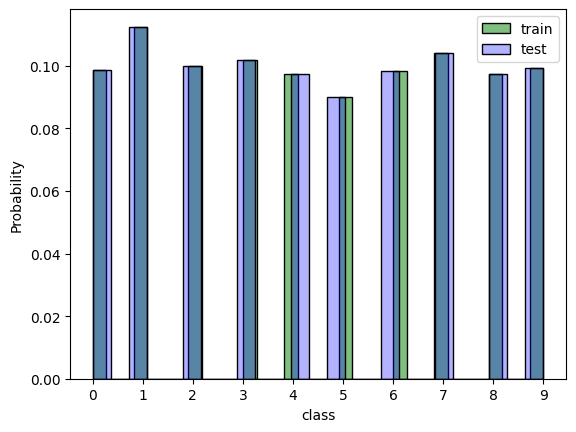

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].iloc[:,:], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)
clf = LogisticRegression(random_state=123)

# Printing the shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
sns.histplot(data=y_train, stat="probability", label="train", alpha=0.5, color="green")
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)
sns.histplot(data=y_test, stat="probability", label="test", alpha=0.3, color="blue")
plt.xticks(np.arange(0, y_train.max() + 1))
plt.legend()
plt.show()


In [5]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold

skfolds = StratifiedKFold(n_splits=5)
count = 0
models = []

for train_index, test_index in skfolds.split(X_train, y_train):
    count += 1
    clone_clf = clone(clf)
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train.iloc[test_index]
    clone_clf.fit(X_train_folds, y_train_folds)
    models.append(clone_clf)
    y_pred = clone_clf.predict(X_test_fold)
    acc_score = accuracy_score(y_pred, y_test_fold)
    print(f"Split #: {count}.\nAccuracy Score: {np.round(acc_score*100, 4)}")


Split #: 1.
Accuracy Score: 91.8061
Split #: 2.
Accuracy Score: 91.4286
Split #: 3.
Accuracy Score: 91.4388
Split #: 4.
Accuracy Score: 92.0408
Split #: 5.
Accuracy Score: 92.0102


In [9]:
from sklearn.metrics import confusion_matrix
import pandas as pd
y_true = np.array([1, 1, 1, 0, 0, 0, 1, 1, 1])
y_pred = np.array([1, 1, 1, 1, 1, 0, 0, 0, 1])
display(pd.crosstab(y_true, y_pred))
display(confusion_matrix(y_true, y_pred))
acc = sum(y_true == y_pred)/len(y_true)
acc

col_0,0,1
row_0,,
0,1,2
1,2,4


array([[1, 2],
       [2, 4]])

0.5555555555555556

In [20]:
# Predict on another dataset using the cross-validated models
predictions = []

for model in models:
    y_pred_proba = model.predict_proba(X_test)  # Change to predict_proba
    y_pred = np.argmax(y_pred_proba, axis=1)
    acc_score = accuracy_score(y_pred, y_test)
    print(f"Split #: {count}.\nAccuracy Score: {np.round(acc_score*100, 4)}")
    predictions.append(y_pred_proba)

# display(predictions)
# Use the predictions as needed
# Calculate average probability for each class
avg_proba = np.mean(predictions, axis=0)

# Get predicted classes based on average probability
predicted_classes = np.argmax(avg_proba, axis=1)
acc_score = accuracy_score(predicted_classes, y_test)
print(f"Average Accuracy Score: {np.round(acc_score*100, 4)}")

# Create a cross-tabulation table
cross_tab = pd.crosstab(y_test, predicted_classes)

display(cross_tab)

Split #: 5.
Accuracy Score: 91.6143
Split #: 5.
Accuracy Score: 91.7857
Split #: 5.
Accuracy Score: 91.7857
Split #: 5.
Accuracy Score: 91.7714
Split #: 5.
Accuracy Score: 91.6952
Average Accuracy Score: 92.1429


col_0,0,1,2,3,4,5,6,7,8,9
class,,,,,,,,,,
0,2013,0,7,3,6,10,10,2,15,5
1,0,2305,10,4,4,9,1,4,20,6
2,17,21,1865,34,22,16,36,26,51,9
3,7,6,41,1939,1,69,7,14,35,23
4,8,8,9,7,1891,2,22,10,17,73
5,24,8,16,64,15,1646,23,8,64,26
6,18,8,19,0,14,39,1954,1,9,1
7,5,5,28,16,22,3,1,2029,6,73
8,15,30,21,57,13,63,13,5,1807,24


# **Метрики якості**

**Вступ**

У цьому розділі ми обговоримо різні метрики оцінки якості, які застосовуються у машинному навчанні.

Метрики якості можуть використовуватися для:

- **Завдання функціоналу помилки** (використовується під час навчання).
- **Підбирання гіперпараметрів** (використовується при вимірі якості на крос-валідації). У тому числі можна використовувати іншу метрику, яка відрізняється від метрики, за допомогою якої побудовано функціонал помилки.
- **Оцінювання підсумкової моделі**: чи придатна модель для вирішення задачі.


# **Метрики в машинному навчанні**

У машинному навчанні використовуються різні метрики для оцінки продуктивності моделей. Ці метрики надають інформацію про те, наскільки добре модель працює, і допомагають порівнювати різні моделі. У цьому ноутбуці ми розглянемо основні метрики, які використовуються в машинному навчанні для завдань регресії.

## **Середньоквадратична помилка (MSE)**

Середньоквадратична помилка (MSE) вимірює середньоквадратичну різницю між прогнозованими і фактичними значеннями. Вона обчислюється за такою формулою:

$$MSE = mean(y_{pred} - y_{true})^2$$

**Переваги**:
- MSE надає вагу більшим помилкам, що корисно для моделей, які потребують штрафування великих помилок.
- Вона є диференційованою і легко оптимізується за допомогою методів на основі градієнта.

**Недоліки**:
- MSE чутлива до викидів, оскільки квадратичні різниці посилюють їх вплив.
- Вона не надає прямого тлумачення магнітуди помилки.

**Реалізація у scikit-learn:**

```python
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_true, y_pred)
```


## **Середня абсолютна помилка (MAE)**

Середня абсолютна помилка (MAE) вимірює середню абсолютну різницю між прогнозованими і фактичними значеннями. Вона обчислюється за такою формулою:

$$MAE = mean(abs(y_{pred} - y_{true}))$$

**Переваги:**
- MAE менш чутлива до викидів порівняно з MSE.
- Вона надає більш зрозумілу магнітуду помилки, оскільки вона виражена в тих самих одиницях, що й цільова змінна.

**Недоліки:**
- MAE не надає ваги більшим помилкам, що може не бути бажаним для деяких моделей.

**Реалізація у scikit-learn:**

```python
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
```

In [ ]:
# lr = LinearRegression().fit(X, y)
# from sklearn.metrics import r2_score
# y_pred = lr.predict(X)
# r2_score_1 = r2_score(y, y_pred)
# r2_score_2 = lr.score(X, y)

## **R-квадрат (Коефіцієнт детермінації)**

R-квадрат, також відомий як коефіцієнт детермінації, вимірює відсоток варіації цільової змінної, який можна пояснити за допомогою ознак. Він обчислюється за такою формулою:

$$R^2 = 1 - \frac{sum(y_{pred} - y_{true})^2}{sum(y_{true} - mean(y_{true}))^2}$$

**Переваги:**
- R-квадрат надає оцінку того, наскільки добре модель пояснює варіацію цільової змінної.
- Він знаходиться в діапазоні від 0 до 1, де 1 вказує на ідеальну прогнозованість, а 0 - на відсутність лінійного зв'язку.

**Недоліки:**
- R-квадрат може бути вводячим у помилку, якщо застосовується до моделей з нелінійними зв'язками.
- Він не враховує складність моделі або кількість ознак.

**Реалізація у scikit-learn:**

```python
from sklearn.metrics import r2_score

r2 = r2_score(y_true, y_pred)
```



## **Середнє квадратичне відхилення (RMSE)**

Середнє квадратичне відхилення (RMSE) вимірює квадратний корінь з середнього квадратичного значення різниць між прогнозованими і фактичними значеннями. Воно обчислюється за формулою:

$$RMSE = sqrt(mean((y_{pred} - y_{true})^2))$$

**Переваги:**
- RMSE дає інтерпретовану магнітуду помилки в тих же одиницях, що й цільова змінна.

**Недоліки:**
- RMSE чутливе до викидів, оскільки квадратичні різниці посилюють їх вплив.
- Воно може бути складним для оптимізації, оскільки включає квадратичний корінь.

**Реалізація у scikit-learn:**

```python
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
```

## **Відсоток абсолютної помилки (MAPE)**

Відсоток абсолютної помилки (MAPE) вимірює відсоток середньої абсолютної різниці між прогнозованими і фактичними значеннями. Він обчислюється за формулою:

$$MAPE = mean(abs((y_{pred} - y_{true}) / y_{true})) * 100$$

**Переваги:**
- MAPE надає відсоткову міру помилки, що дозволяє порівняти моделі для різних масштабів даних.
- Він знаходиться в одиницях відсотку, що дозволяє легше інтерпретувати помилку.

**Недоліки:**
- MAPE не враховує масштаб відхилень, тому великі відхилення можуть мати великий вплив на результат.
- Він не є диференційованим і складним для оптимізації.

**Реалізація у scikit-learn:**

```python
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_true, y_pred)
```


# **Метрики якості у завданнях класифікації**

У задачах класифікації використовуються різні метрики для оцінки якості моделей. В цьому ноутбуці ми розглянемо основні метрики, що використовуються в класифікаційних задачах.

|  True/Predicted    |     Negative    |     Positive    |
|--------------------|-----------------|-----------------|
| Actual Negative    | True Negative   | False Positive  |
| Actual Positive    | False Negative  | True Positive   |

## **Accuracy (Точність)**

Accuracy (Точність) вимірює відношення кількості правильно класифікованих зразків до загальної кількості зразків. Воно обчислюється за формулою:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

**Переваги:**
- Accuracy проста у розумінні і інтерпретації.
- Вона показує загальну ефективність класифікатора.

**Недоліки:**
- Accuracy може бути неадекватною метрикою у незбалансованих класифікаційних задачах, де один клас переважає над іншими.
- Вона не враховує помилки класифікації окремих класів.

**Реалізація у scikit-learn:**

```python
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
```


In [24]:
from sklearn.metrics import confusion_matrix
import pandas as pd
y_true = np.array([1, 1, 1, 0, 0, 0, 1, 1, 1])
y_pred = np.array([1, 1, 1, 1, 1, 0, 0, 1, 1])
display(pd.crosstab(y_true, y_pred))
display(confusion_matrix(y_true, y_pred))
acc = sum(y_true == y_pred)/len(y_true)
acc


col_0,0,1
row_0,,
0,1,2
1,1,5


array([[1, 2],
       [1, 5]])

0.6666666666666666

## **Precision (Точність)**

Precision (Точність) вимірює відношення кількості правильно класифікованих позитивних зразків (TP) до загальної кількості позитивно класифікованих зразків (TP + FP). Воно обчислюється за формулою:

$$Precision = \frac{TP}{TP + FP}$$

**Переваги:**
- Precision зосереджується на якості класифікації позитивного класу.
- Воно корисне в задачах, де ложнопозитивні результати є неприйнятними.

**Недоліки:**
- Precision не враховує всіх негативних зразків, які були помилково класифіковані.
- Він може давати високі результати у випадку нерівномірного розподілу класів.

**Реалізація у scikit-learn:**

```python
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred)
```

## **Recall (Повнота)**

Recall (Повнота) вимірює відношення кількості правильно класифікованих позитивних зразків (TP) до загальної кількості позитивних зразків (TP + FN). Воно обчислюється за формулою:

$$Recall = \frac{TP}{TP + FN}$$

**Переваги:**
- Recall зосереджується на здатності класифікатора виявляти всі позитивні зразки.
- Воно корисне в задачах, де пропуск позитивних зразків є неприйнятним.

**Недоліки:**
- Recall не враховує всіх негативних зразків, які були помилково класифіковані.
- Він може давати низькі результати у випадку нерівномірного розподілу класів.

**Реалізація у scikit-learn:**

```python
from sklearn.metrics import recall_score

recall = recall_score(y_true, y_pred)
```


## **F1-міра (F1-score)**

Зважене поєднання точності та повноти важливе у багатьох задачах класифікації. Однією з найпоширеніших метрик, яка дозволяє зробити таке поєднання, є F1-міра.

**F1-міра** - це гармонійне середнє між точністю (precision) та повнотою (recall). Вона використовується для оцінки ефективності класифікатора з урахуванням як його здатності правильно визнавати позитивні зразки (precision), так і його здатності виявляти всі позитивні зразки (recall).

**F1-міра обчислюється наступним чином:**

$$F1 = 2 * \frac{precision \cdot recall}{precision + recall}$$

**Переваги використання F1-міри:**
- F1-міра враховує як точність, так і повноту, що дозволяє збалансувати оцінку моделі з урахуванням обох аспектів.
- Вона особливо корисна, коли важливо досягти якнайкращого компромісу між точністю і повнотою, особливо при незбалансованих класах.

**Недоліки F1-міри:**
- F1-міра не розглядає негативні зразки, тому вона може бути неадекватною, коли негативний клас має велику вагу.

Загалом, F1-міра є корисною метрикою для оцінки моделей класифікації, особливо у випадках, коли точність та повнота мають однакову вагу і важливо досягти балансу між цими двома показниками.

In [39]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score

col_0,0,1
row_0,,
0,3,6
1,2,9


Точність (Precision): 60.00
Повнота (Recall): 81.82
F1-міра (F1 Score): 69.23


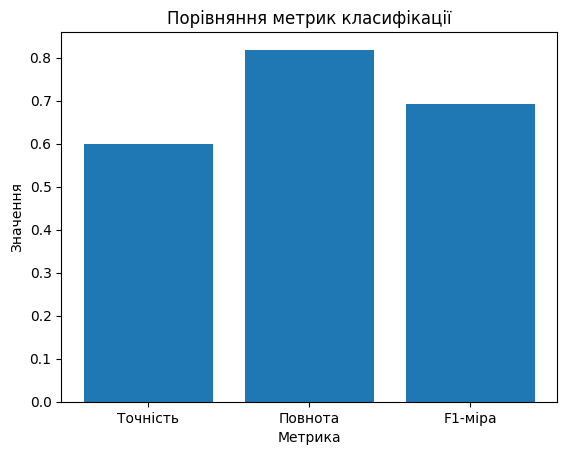

In [40]:
# Припустимо, що ми отримали наступні результати передбачення:
y_true = [1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0]
y_pred = [1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]

display(pd.crosstab(y_true, y_pred))
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Точність (Precision): {precision*100:.2f}")
print(f"Повнота (Recall): {recall*100:.2f}")
print(f"F1-міра (F1 Score): {f1*100:.2f}")

import matplotlib.pyplot as plt

labels = ['Точність', 'Повнота', 'F1-міра']
scores = [precision, recall, f1]

plt.bar(labels, scores)
plt.xlabel('Метрика')
plt.ylabel('Значення')
plt.title('Порівняння метрик класифікації')
plt.show()


# **Precision-Recall Curve (PR-Curve) (Не стійка до несбалансованого датасету по класам)**
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


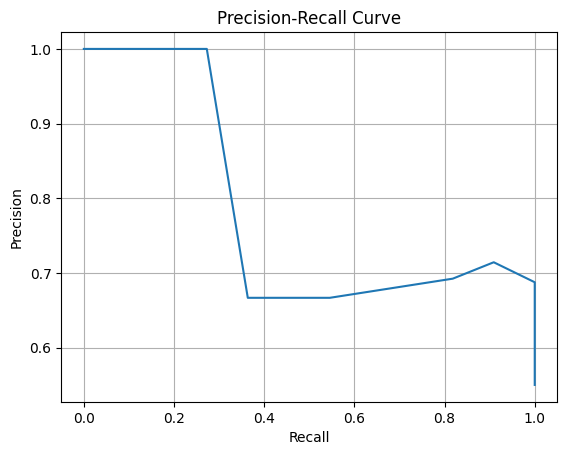

In [41]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_true = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])
y_pred = np.array([1, 0.2, 0.7, 0.8, 0.4, 0.6, 0.3, 0.9, 0.5, 0.6, 0.7, 0.8, 0.2, 0.4, 0.6, 0.8, 0.9, 0.6, 0.7, 0.1])

precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred)
print(thresholds)
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [51]:
from sklearn.metrics import precision_score, auc
y_pred[y_pred>0.3] = 1
y_pred[y_pred != 1] = 0
y_pred
precision_score(y_pred, y_true)

1.0

PR-AUC Score: 69.18


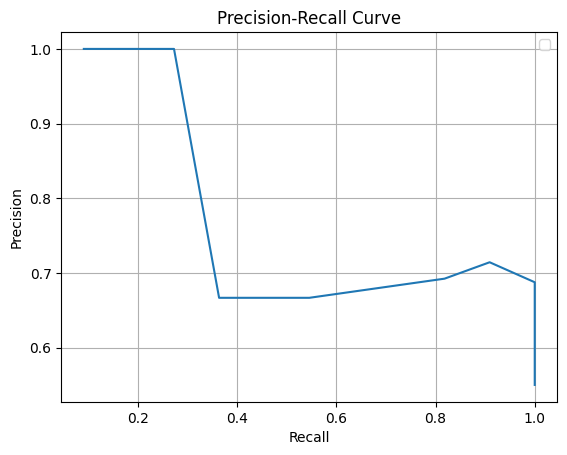

In [53]:
import numpy as np

def calculate_precision_recall_curve(y_true, y_scores):
    thresholds = np.linspace(0, 1, 101)
    precisions = []
    recalls = []

    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        # true_positives = np.sum((y_true == 1) & (y_pred == 1))
        # false_positives = np.sum((y_true == 0) & (y_pred == 1))
        # false_negatives = np.sum((y_true == 1) & (y_pred == 0))

        # precision = true_positives / (true_positives + false_positives)
        # recall = true_positives / (true_positives + false_negatives)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)

        precisions.append(precision)
        recalls.append(recall)

    return precisions, recalls, thresholds

y_true = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])
y_pred = np.array([1, 0.2, 0.7, 0.8, 0.4, 0.6, 0.3, 0.9, 0.5, 0.6, 0.7, 0.8, 0.2, 0.4, 0.6, 0.8, 0.9, 0.6, 0.7, 0.1])

precisions, recalls, thresholds = calculate_precision_recall_curve(y_true, y_pred)

pr_auc = auc(recalls, precisions)
print(f"PR-AUC Score: {pr_auc*100:.2f}")

import matplotlib.pyplot as plt

# plt.plot(thresholds, precisions, label="precision")
# plt.plot(thresholds, recalls, label="recall")
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.legend()
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


Best Threshold: 0.31
Best F1 Score: 81.48


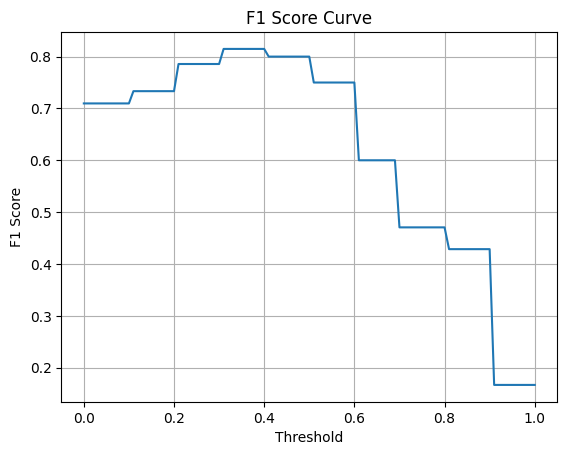

In [55]:
import numpy as np

def calculate_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

def find_best_threshold(precisions, recalls):
    f1_scores = [calculate_f1_score(precision, recall) for precision, recall in zip(precisions, recalls)]
    best_threshold = np.argmax(f1_scores)
    return best_threshold, f1_scores[best_threshold], f1_scores

best_threshold, best_f1_score, f1_scores = find_best_threshold(precisions, recalls)
print("Best Threshold:", thresholds[best_threshold])
print(f"Best F1 Score: {best_f1_score*100:.2f}")

# Plot the F1 score curve
plt.plot(thresholds, f1_scores)
plt.title('F1 Score Curve')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

# **ROC-AUC Curve (Стійка до несбалансованого датасету по класам)**


https://en.wikipedia.org/wiki/Receiver_operating_characteristic

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

**Крива ROC AUC (Receiver Operating Characteristic Area Under the Curve)** - це графічне представлення результатів бінарної класифікаційної моделі. Вона ілюструє залежність між показниками TPR (True Positive Rate - чутливість) та FPR (False Positive Rate - специфічність) при різних порогових значеннях класифікації. Крива ROC AUC широко використовується для оцінки прогностичної здатності та розрізнювальної здатності класифікаційної моделі.

- **Чутливість (TPR) або Виявлення або Повнота:** TPR є співвідношенням правильно класифікованих позитивних екземплярів (True Positives) до загальної кількості фактично позитивних екземплярів (True Positives + False Negatives). **Вона вимірює здатність моделі правильно виявляти позитивні екземпляри.**

$$TPR = \frac{TP}{TP + FN}$$

- **Специфічність (FPR):** FPR є співвідношенням неправильно класифікованих негативних екземплярів (False Positives) до загальної кількості фактично негативних екземплярів (False Positives + True Negatives). **Вона вимірює нахил моделі класифікувати негативні екземпляри як позитивні.**

$$FPR = \frac{FP}{FP + TN}$$

Крива ROC AUC створюється шляхом побудови графіку TPR (Чутливості) по осі ординат та FPR (1 - Специфічності) по осі абсцис для різних порогових значень класифікації. Кожна точка на кривій відповідає конкретному пороговому значенню. **Площа під кривою ROC AUC (AUC) відображає загальну ефективність моделі, де більша площа AUC вказує на кращу ефективність.**


In [56]:
import numpy as np

def calculate_tpr_fpr(y_true, y_scores):
    thresholds = np.arange(0.0, 1.11, 0.1)
    true_positive_rates = []
    false_positive_rates = []

    P = sum(y_true)
    N = len(y_true) - P

    for thresh in thresholds:
        FP = 0
        TP = 0
        thresh = round(thresh, 2)

        for i in range(len(y_scores)):
            if y_scores[i] >= thresh:
                if y_true[i] == 1:
                    TP += 1
                else:
                    FP += 1

        FN = P - TP
        TN = N - FP

        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)

        true_positive_rates.append(TPR)
        false_positive_rates.append(FPR)

    return true_positive_rates, false_positive_rates, thresholds


Alternative way to calculate ROC-AUC Score: 62.64


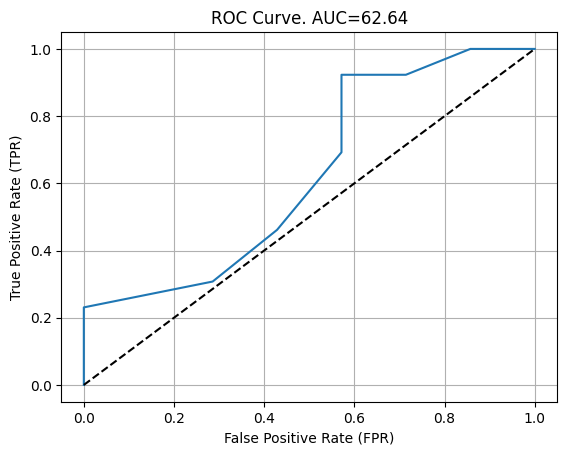

In [68]:
import numpy as np
import matplotlib.pyplot as plt

y_true = np.array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0])
y_pred = np.array([1, 0.2, 0.7, 0.8, 0.4, 0.6, 0.3, 0.9, 0.5, 0.6, 0.7, 0.8, 0.2, 0.4, 0.6, 0.8, 0.9, 0.6, 0.7, 0.1])
df = pd.DataFrame({"y_true": y_true, "y_pred": y_pred})

tpr, fpr, thr = calculate_tpr_fpr(df.y_true, df.y_pred)
auc_score = roc_auc_score(y_true, y_pred)
roc_auc = auc(fpr, tpr)
print(f"Alternative way to calculate ROC-AUC Score: {roc_auc*100:.2f}")

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.title(f'ROC Curve. AUC={auc_score*100:.2f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)
plt.show()

Alternative way to calculate ROC-AUC Score: 62.64


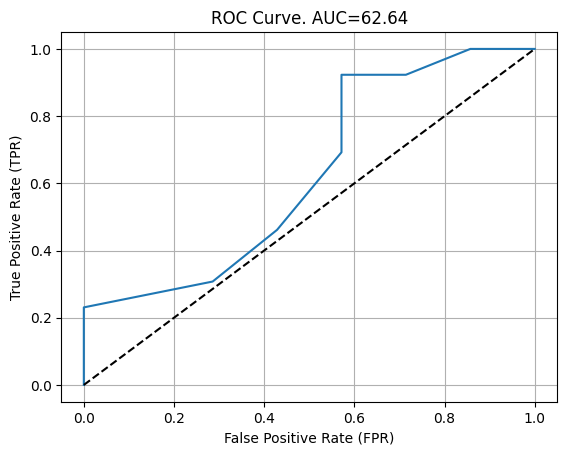

In [69]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc


# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr_, tpr_, thresholds = roc_curve(y_true, y_pred)
auc_score = roc_auc_score(y_true, y_pred)
roc_auc = auc(fpr, tpr)
print(f"Alternative way to calculate ROC-AUC Score: {roc_auc*100:.2f}")

# Plot the ROC curve
plt.plot(fpr_, tpr_)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.title(f'ROC Curve. AUC={auc_score*100:.2f}')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.grid(True)
plt.show()


In [70]:
pd.crosstab(y_true, y_pred)

col_0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
row_0,,,,,,,,,,
0,1,1,1,0,0,1,1,2,0,0
1,0,1,0,2,1,3,2,1,2,1


In [71]:
y_pred[y_pred >= 0.21] = 1
y_pred[y_pred != 1] = 0
print(classification_report(y_true, y_pred))
print("Accuracy", accuracy_score(y_true, y_pred))
print("Precision", precision_score(y_true, y_pred))
print("Recall", recall_score(y_true, y_pred))
print("F1-score", f1_score(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.71      0.92      0.80        13

    accuracy                           0.70        20
   macro avg       0.69      0.60      0.60        20
weighted avg       0.69      0.70      0.66        20

Accuracy 0.7
Precision 0.7058823529411765
Recall 0.9230769230769231
F1-score 0.8000000000000002


# **Додаткова інформація щодо метрик для несбалансованого датасету**

У проблемах з незбалансованими класами, коли кількість прикладів в різних класах значно відрізняється, деякі метрики є більш придатними для оцінки продуктивності моделі, ніж інші. Окрім загальновживаних метрик, таких як точність (accuracy), точність (precision), повнота (recall), F1-міра (F1 score), ROC AUC-крива (ROC AUC curve) та крива точність-повнота (precision-recall curve), для оцінки класифікації з незбалансованими класами можна використовувати такі метрики:

1. **Специфічність (Specificity):** Специфічність вимірює здатність моделі правильно ідентифікувати випадки негативного класу. Вона обчислюється як TN / (TN + FP) і надає уявлення про продуктивність моделі щодо більшості класу.

2. **Збалансована точність (Balanced Accuracy):** Збалансована точність враховує незбалансованість у розподілі класів, шляхом усереднення точності кожного класу. Вона обчислюється як (TPR + TNR) / 2 і надає більш збалансовану оцінку продуктивності моделі.

3. **Геометричне середнє (Geometric Mean):** Геометричне середнє точності та повноти є ще однією метрикою, яка є корисною для класифікації з незбалансованими класами. Воно обчислюється як квадратний корінь з (precision * recall) і надає збалансовану міру продуктивності моделі для обох класів.

4. **Коефіцієнт Коена (Cohen's Kappa):** Коефіцієнт Коена є статистичним показником, який вимірює узгодженість між передбаченими та фактичними мітками класів, враховуючи випадкову узгодженість. Він часто використовується, коли є значний дисбаланс між класами.

5. **Коефіцієнт кореляції Меттьюса (Matthews Correlation Coefficient, MCC)**: Коефіцієнт кореляції Меттьюса є метрикою, яка поєднує істинно позитивні, істинно негативні, хибно позитивні та хибно негативні рейти в одне значення. Він знаходиться в діапазоні від -1 до 1, де 1 вказує на ідеальні передбачення, 0 вказує на випадкові передбачення, а -1 вказує на повну незгоду між передбаченими та фактичними мітками.

Ці метрики надають альтернативні способи оцінки продуктивності моделей у задачах класифікації з незбалансованими класами та дають більш комплексне уявлення про поведінку моделі, поза стандартними метриками.

**Джерела:**
1. Specificity: [Link](https://en.wikipedia.org/wiki/Sensitivity_and_specificity#Specificity)
2. Balanced Accuracy: [Link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html)
3. Geometric Mean: [Link](https://en.wikipedia.org/wiki/Geometric_mean)
4. Cohen's Kappa: [Link](https://en.wikipedia.org/wiki/Cohen%27s_kappa)
5. Matthews Correlation Coefficient (MCC): [Link](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient)

# **Ось основні метрики, які використовуються в задачах класифікації, разом із їх стійкістю до незбалансованих даних:**

https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

1. **Accuracy Score (Точність):** Вимірює загальну правильність передбачень моделі, обчислюючи співвідношення правильних передбачень до загальної кількості передбачень. Вона не є стійкою до незбалансованих даних, оскільки може бути оманливою, коли класи незбалансовані. Вона може показувати високу точність, навіть коли меншиновий клас помилково класифікується.

2. **Precision Score (Точність):** Вимірює відношення правильно передбачених позитивних випадків (True Positives) до загальної кількості випадків, передбачених як позитивні. Вона не є стійкою до незбалансованих даних, оскільки не враховує помилкові негативні передбачення (False Negatives), які мають велике значення в незбалансованих сценаріях, коли меншиновий клас є об'єктом інтересу.

3. **Recall Score (Повнота):** Вимірює відношення правильно передбачених позитивних випадків (True Positives) до загальної кількості фактичних позитивних випадків. Вона більш стійка до незбалансованих даних, оскільки враховує помилкові негативні передбачення (False Negatives), що важливо, коли акцент зроблений на виявленні всіх позитивних випадків, особливо в меншиновому класі.

4. **F1 Score:** F1-міра є гармонічним середнім точності і повноти. Вона поєднує точність і повноту в одну метрику, забезпечуючи баланс між ними. Вона більш стійка до незбалансованих даних, порівняно з точністю в одиночку, але все ще сильно залежить від повноти.

5. **Precision-Recall Curve (Крива точність-повнота):** Крива точність-повнота є графічним представленням залежності між точністю і повнотою для різних порогових значень класифікації. Вона корисна для незбалансованих даних, оскільки надає відомості про продуктивність моделі при різних порогових значеннях. Однак вона сама по собі не вирішує проблему незбалансованих класів.

6. **ROC AUC Curve (Крива ROC-AUC):** Крива ROC (Receiver Operating Characteristic) відображає залежність між часткою правильних позитивних передбачень (TPR) і часткою неправильних позитивних передбачень (FPR) для різних порогових значень класифікації. Площа під кривою ROC (AUC) вимірює продуктивність моделі. Вона відносно стійка до незбалансованих даних, оскільки враховує компроміс між часткою правильних позитивних і неправильних позитивних передбачень. Проте вона все ще може бути вплинута незбалансованістю класів, особливо коли переважає більшість класів.

**Важливо відзначити**, що хоча ці метрики можуть не бути самостійно стійкими до незбалансованих даних, існують техніки та стратегії, які допомагають вирішувати проблему незбалансованості класів, такі як оверсемплінг, андерсемплінг та використання відповідних метрик оцінки, спеціально розроблених для незбалансованих даних, таких як площа під кривою точність-повнота (PR AUC) або збалансована точність (balanced accuracy).

**Джерела:**
- [Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [Precision Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
- [Recall Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
- [F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
- [Precision-Recall Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)
- [ROC AUC Curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)